## Math 104A    HW 2

####  Qingze Lan, 3046380

### Question 1
(a). $$P_2 = l_0(x)f_0+l_1(x)f_1+l_2(x)f_2\\
 = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f_0+\frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f_1+\frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}\\=\frac{(x-1)(x-3)}{(0-1)(0-3)}(1)+\frac{(x-0)(x-3)}{(1-0)(1-3)}(1)+\frac{(x-0)(x-1)}{(3-0)(3-1)}(-5)\\= \frac{1}{3}(x-1)(x-3)-\frac{1}{2}x(x-3)-\frac{5}{6}x(x-1)$$

(b). Take x = 2. $$f(2)\approx P_2(2) = \frac{1}{3}(1)(-1)-\frac{1}{2}(2)(-1)-\frac{5}{6}(2)(1) =-1 $$

### Question 2 
(a)

In [9]:
# define a function to compute the barycentric weights
# Lambda(j) = 1/(w'(xj)) 
def ww(xj,setofx):
    Base = 1
    for xk in setofx:
        if xk != xj:
            Base = Base * (xj - xk)
        else:
            Base = Base 
    return Base 
            
def General_Lambda(j,setofx):
    return 1/ww(j,setofx)

In [10]:
# define a function to use the values of Lambda in the Barycentric Formula. 
def bn1(x, setofx, setofy,fL):
    Basee = 0
    for j in setofx:
        yj = setofy[setofx.index(j)]
        if x != j:
            Basee+=fL(j,setofx)/(x-j)*yj
    return Basee

In [11]:
def bn2(x,setofx,fL):
    base2=0
    for j in setofx:
        if x!=j:
            base2+=(fL(j,setofx)/(x-j))
    return base2
def bn(x,setofx, setofy,fL):
    if bn2(x,setofx,fL)!=0:
        return (bn1(x,setofx,setofy,fL)/bn2(x,setofx,fL))

(b)

In [12]:
setofx = [0.00,0.25,0.50,0.75,1.25,1.50]
setofy = [0.0000,0.7071,1.0000,0.7071,-0.7071,-1.0000]
bn(2,setofx,setofy,General_Lambda)

0.8519999999999989

Therefore, the approximation of f(2) by $P_5(2)$ is 0.8519999999999989.

### Question 3
(a). Define the function Lambda for equidistributed nodes to reduce computational cost. 

In [19]:
import numpy as np
import numpy.linalg as npla
import math
from scipy.special import comb
import matplotlib.pyplot as plt
from matplotlib import cm
import tkinter
from mpl_toolkits.mplot3d import axes3d 
%matplotlib inline

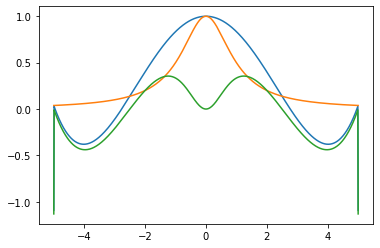

In [20]:
# define the set of x when n = 4, 8 and 12. 
setofxN4 = list(np.linspace(-5,5,5))
setofxN8 = list(np.linspace(-5,5,9))
setofxN12 = list(np.linspace(-5,5,13))
def LambdaEqui(j,setofx):
    return ((-1)**setofx.index(j))*math.factorial(len(setofx)-1)/math.factorial(setofx.index(j))/math.factorial(len(setofx)-1-setofx.index(j))
# define the function f(x)
def f(x):
    return 1/(1+(x**2))
              
def setofF(f,setofx):
    setss = []
    for i in setofx:
        setss.append(f(i))
    return setss
    
xi = np.linspace(5,-5,1000)

def en(a,b):
    return a-b
# plot for n = 4
points4a4 = np.array([bn(x,setofxN4,setofF(f,setofxN4),LambdaEqui) for x in xi])
pointsf = np.array([f(x) for x in xi])
plt.plot(xi,points4a4)
plt.plot(xi,pointsf)

errorpoints = np.array([en(bn(x,setofxN4,setofF(f,setofxN4),LambdaEqui),f(x)) for x in xi])
plt.plot(xi,errorpoints)


    

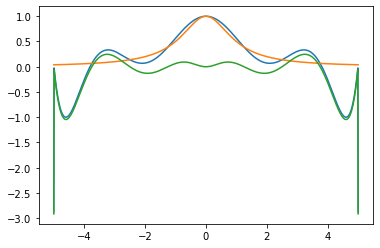

In [21]:
# plot for n = 8
points4a8 = np.array([bn(x,setofxN8,setofF(f,setofxN8),LambdaEqui) for x in xi])
plt.plot(xi,points4a8)
plt.plot(xi,pointsf)

errorpoints = np.array([en(bn(x,setofxN8,setofF(f,setofxN8),LambdaEqui),f(x)) for x in xi])
plt.plot(xi,errorpoints)

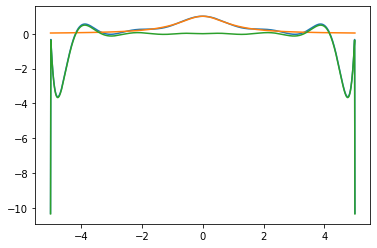

In [22]:
# plot for n = 12
points4a12 = np.array([bn(x,setofxN12,setofF(f,setofxN12),LambdaEqui) for x in xi])
plt.plot(xi,points4a12)
plt.plot(xi,pointsf)

errorpoints = np.array([en(bn(x,setofxN12,setofF(f,setofxN12),LambdaEqui),f(x)) for x in xi])
plt.plot(xi,errorpoints)

(b). Define the set of x for Chebyshev nodes. 

In [23]:
def setofxC(n):
    listofx  = []
    for j in range(0,n+1):
        listofx.append(5*math.cos(j*math.pi/n))
    return listofx 
setofxC_4 = setofxC(4)
setofxC_8= setofxC(8)
setofxC_12 = setofxC(12)
setofxC_100 = setofxC(100)
# Define Lambda function for it
def LambdaChe(j,setofx):
    a = len(setofx)-1
    b = setofx.index(j)
    if b == 0 or b==a:
        return 1/2*(-1)**b
    else:
        return (-1)**b

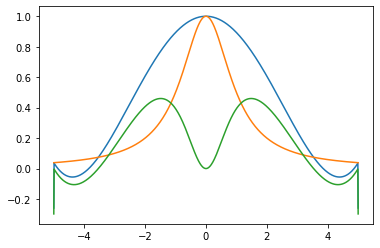

In [24]:
# plot for n = 4
points4b4 = np.array([bn(x,setofxC(4),setofF(f,setofxC(4)),LambdaChe) for x in xi])
pointsf = np.array([f(x) for x in xi])
plt.plot(xi,points4b4)
plt.plot(xi,pointsf)

errorpoints = np.array([en(bn(x,setofxC(4),setofF(f,setofxC(4)),LambdaChe),f(x)) for x in xi])
plt.plot(xi,errorpoints)

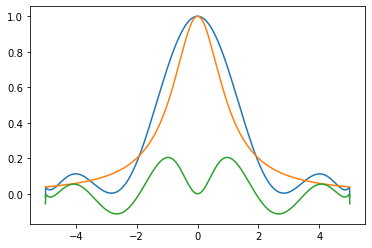

In [25]:
# for n = 8
points4b8 = np.array([bn(x,setofxC(8),setofF(f,setofxC(8)),LambdaChe) for x in xi])
plt.plot(xi,points4b8)
plt.plot(xi,pointsf)

errorpoints = np.array([en(bn(x,setofxC(8),setofF(f,setofxC(8)),LambdaChe),f(x)) for x in xi])
plt.plot(xi,errorpoints)

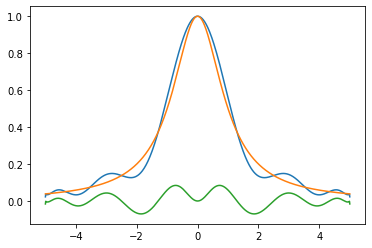

In [26]:
# for n = 12
points4b12 = np.array([bn(x,setofxC(12),setofF(f,setofxC(12)),LambdaChe) for x in xi])
plt.plot(xi,points4b12)
plt.plot(xi,pointsf)

errorpoints = np.array([en(bn(x,setofxC(12),setofF(f,setofxC(12)),LambdaChe),f(x)) for x in xi])
plt.plot(xi,errorpoints)

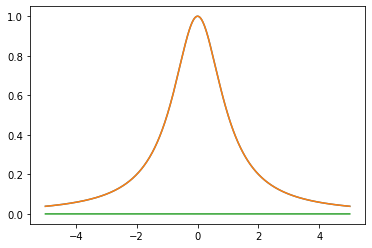

In [27]:
# for n = 100
points4b100 = np.array([bn(x,setofxC(100),setofF(f,setofxC(100)),LambdaChe) for x in xi])
plt.plot(xi,points4b100)
plt.plot(xi,pointsf)

errorpoints = np.array([en(bn(x,setofxC(100),setofF(f,setofxC(100)),LambdaChe),f(x)) for x in xi])
plt.plot(xi,errorpoints)

(c). Need to define f(x) for $e^{-x^{2}/5}$

In [30]:
def fe(x):
    return np.exp(-(x**2)/5)

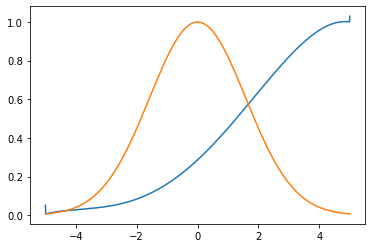

In [31]:
# for n = 4

points4d4 = np.array([bn(x,setofxN4,setofF(fe,setofxN8),LambdaEqui) for x in xi])
pointsfe = np.array([fe(x) for x in xi])
plt.plot(xi,points4d4)
plt.plot(xi,pointsfe)


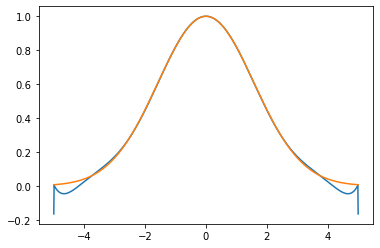

In [32]:
# for n = 8
points4d8 = np.array([bn(x,setofxN8,setofF(fe,setofxN8),LambdaEqui) for x in xi])
plt.plot(xi,points4d8)
plt.plot(xi,pointsfe)

# in the graph the two lines are most the same except for points around -5 and 5

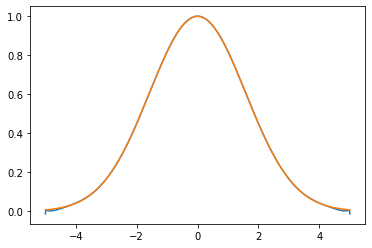

In [33]:
# for n = 12
points4d12 = np.array([bn(x,setofxN12,setofF(fe,setofxN12),LambdaEqui) for x in xi])
plt.plot(xi,points4d12)
plt.plot(xi,pointsfe)

The result shown that this time equidistributed nodes are suitable to approximate the function. 

### Question 4

According to Cauchy’s Remainder

(a)
$$f(x)-P_n(x) = \frac{1}{(n+1)!}f^{n+1}(\xi(x))(x-x_0)(x-x_1)...(x-x_n)$$

Since $$\parallel{f-P_1}\parallel_\infty = \max_{x\in[x_0,x_1]}\qquad\mid{f(x)-P_1(x)}\mid\\= \max_{x\in[x_0,x_1]}\qquad\frac{1}{2!}f^{(2)}(\xi(x))(x-x_0)(x-x_1)$$

First, we want $(x-x_0)(x-x_1)$ reaches maximum and it reaches maximum when $x = \frac{x_0+x_1}{2}$

Hence, $$\parallel{f-P_1}\parallel_\infty = \max_{x\in[x_0,x_1]}\qquad{\frac{1}{2!}f^{(2)}(\xi(x))\frac{(x_1-x_0)(x_1-x_0)}{4}}$$

Since $\xi(x)\leq\max{{x_0,...,x_n}}, \mid{f^{(2)}(x)}\mid\leq{M_2}$

Therefore, $$\parallel{f-P_1}\parallel_\infty = \max_{x\in[x_0,x_1]}\qquad\mid{\frac{1}{8}f^{(2)}(x)(\xi(x))(x_1-x_0)^{2}}\mid\\ \leq \frac{1}{8}(x_1-x_0)^{2}{M_2}$$

(b)

$f(x) = sin(x), so f^{(2)}(x) = -sin(x)$

$$\parallel{f-P_1}\parallel_\infty = \max_{x\in[x_0,x_1]}\qquad\mid{\frac{1}{8}f^{(2)}(x)(x_1-x_0)^{2}}\mid \leq \frac{1}{8}(x_1-x_0)^{2}{M_2}$$

$x_1 = \frac{\pi}{2}$, $x_0 = 0$

$\parallel{f-P_1}\parallel_\infty$ reaches maximum when $f^{(2)}(x)$ is maximum

$$\max{\mid{f^{(2)}(x)}\mid} = \mid{f^{(2)}(\frac{\pi}{2})}\mid = \mid{-sin(\frac{\pi}{2})}\mid = 1$$

$$\max{\parallel{f-P_1}\parallel_\infty} = \frac{1}{8}\times1\times(\frac{\pi}{2})^{2} = \frac{\pi^{2}}{32}$$

When $x = \frac{\pi}{4}$

$$\mid{f-P_1}\mid = \mid{\frac{1}{8}\times(\frac{\pi}{2})^{2}\times{sin(\frac{\pi}{4})}}\mid = \frac{\sqrt{2}\pi^{2}}{64}$$

And we have $\frac{\sqrt{2}\pi^{2}}{64} < \frac{\pi^{2}}{32}$